# 1. Modeling gravitational fields

## 1.1 Defining a vector field

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x,y):
    return (-2*y, x)

In [3]:
def plot_vector_field(f,xmin,xmax,ymin,ymax,xstep=1,ystep=1):

    X,Y = np.meshgrid(np.arange(xmin,xmax, xstep),np.arange(ymin,ymax, ystep))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color='red')
    fig = plt.gcf()
    fig.set_size_inches(7,7)

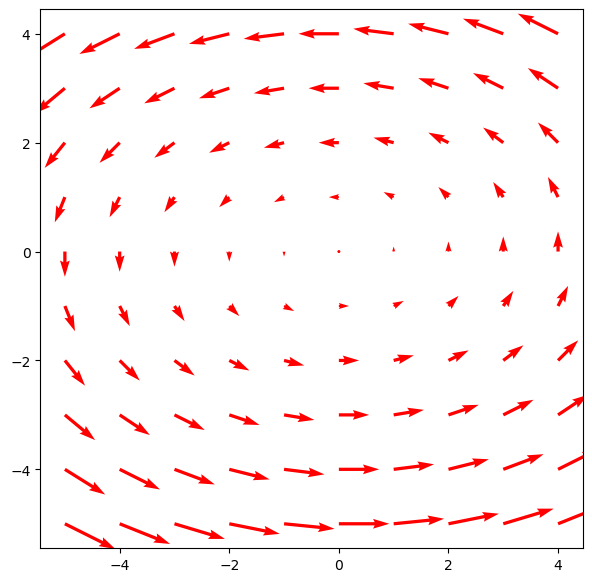

In [4]:
plot_vector_field(f,-5,5,-5,5)

## 1.2 Defining a simple force field

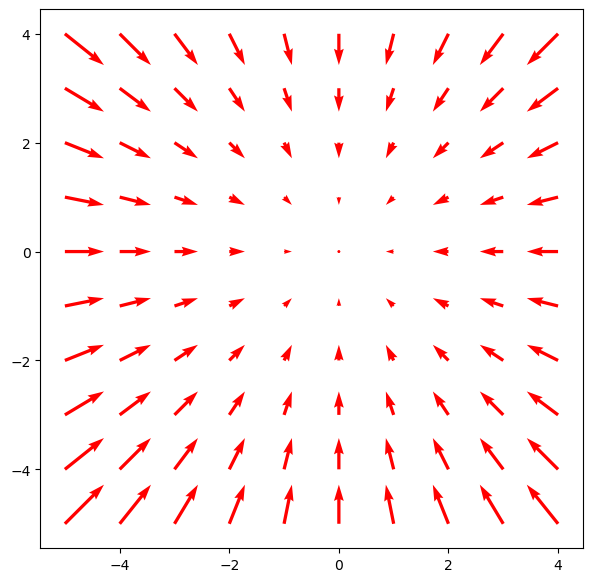

In [5]:
def f(x,y):
    return (-x,-y)

plot_vector_field(f,-5,5,-5,5)

# 2. Adding gravity to the asteroid game

See asteroids.py

## 2.2 Exercises

**EXERCISE** Where do all of the vectors in the vector field $(-2-x,4-y)$ point?

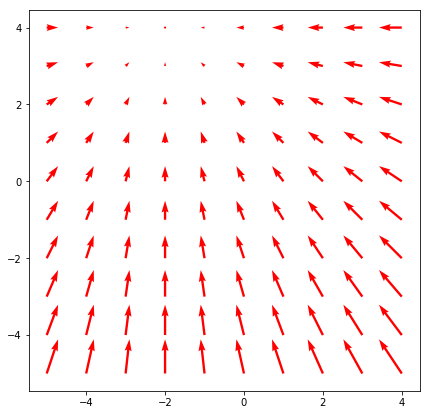

In [11]:
def g(x,y):
    return (-2-x,4-y)
plot_vector_field(g,-5,5,-5,5)

# 3 Introducing potential energy

## 3.1 Defining a potential energy scalar field

In [12]:
def u(x,y):
    return 0.5 * (x**2 + y**2)

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xstep=0.25,ystep=0.25,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

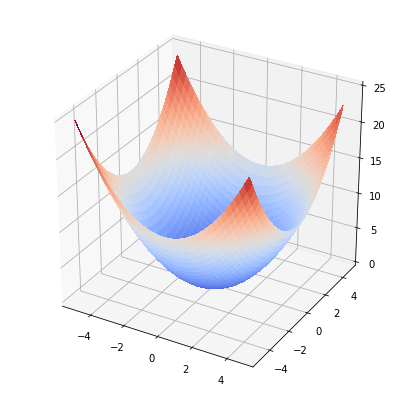

In [17]:
plot_scalar_field(u, -5, 5, -5, 5)

## 3.2 Plotting a scalar field as a heatmap

<Figure size 504x504 with 0 Axes>

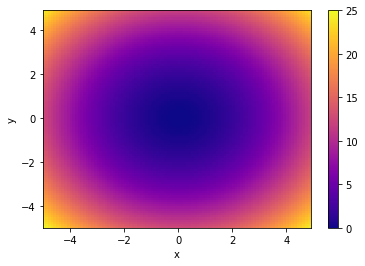

In [18]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xstep=0.1,ystep=0.1):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    plt.xlabel('x')
    plt.ylabel('y')

scalar_field_heatmap(u,-5,5,-5,5)

## 3.3 Plotting a scalar field as a contour map

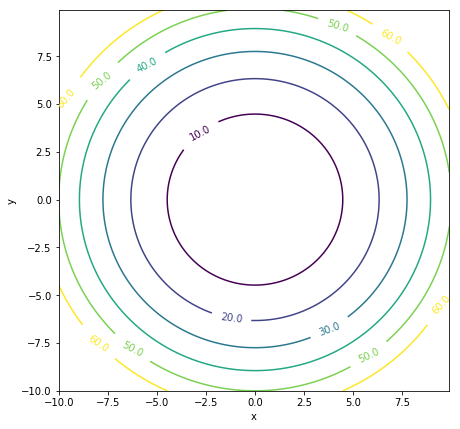

In [19]:
def scalar_field_contour(f,xmin,xmax,ymin,ymax,levels=None):

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, 0.1)
    Y = np.arange(ymin, ymax, 0.1)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    Z = fv(X,Y)
    
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z,levels=levels)
    ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')
    plt.xlabel('x')
    plt.ylabel('y')
    fig.set_size_inches(7,7)
    
scalar_field_contour(u,-10,10,-10,10,levels=[10,20,30,40,50,60])

# 4 Connecting energy and forces with the gradient

## 4.5 Exercises

**Exercise:** Plot the cross-section of $h(x,y) = e^y\sin(x)$ where $y=1$.  Plot the cross section of $h(x,y)$ where $x=\pi/6$.

In [21]:
def plot_function(f,xmin,xmax,color=None):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],c=color)

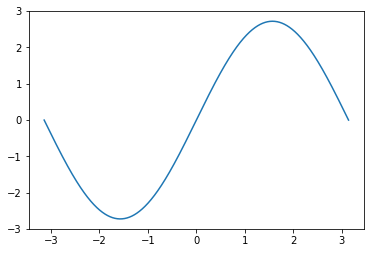

In [25]:
from math import pi, e, sin
plot_function(lambda x: e*sin(x),-pi,pi)

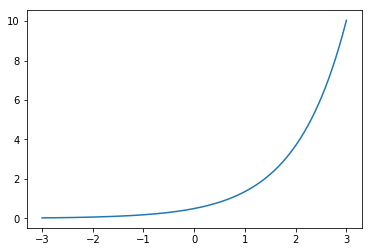

In [26]:
import math
plot_function(lambda y: math.exp(y)/2,-3,3)